In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Company Data

In [5]:
data=pd.read_csv('Company_Data.csv')
print(data.shape)
data.head(5)

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
feature_cols = ('CompPrice','Income','Advertising','Population','Price','Age','Education')

In [6]:
data.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [7]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

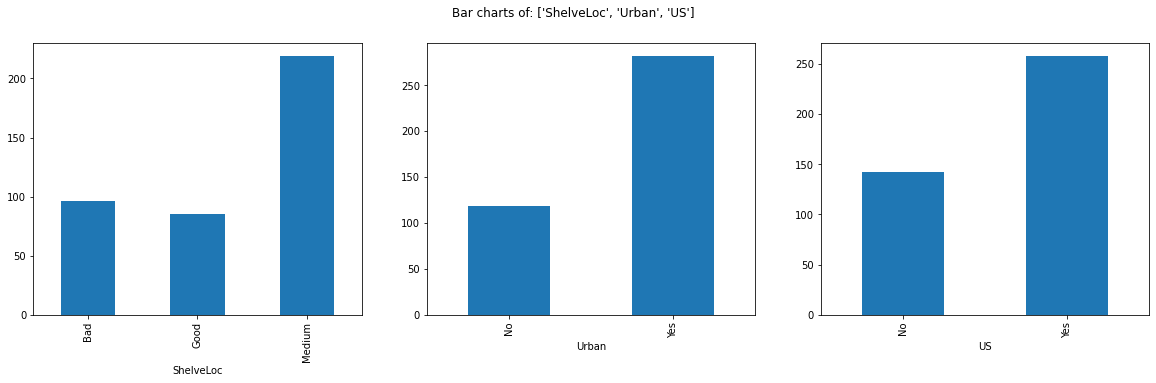

In [9]:
PlotBarCharts(inpData=data, 
              colsToPlot=['ShelveLoc', 'Urban', 'US'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000162C07F5490>,
      dtype=object)

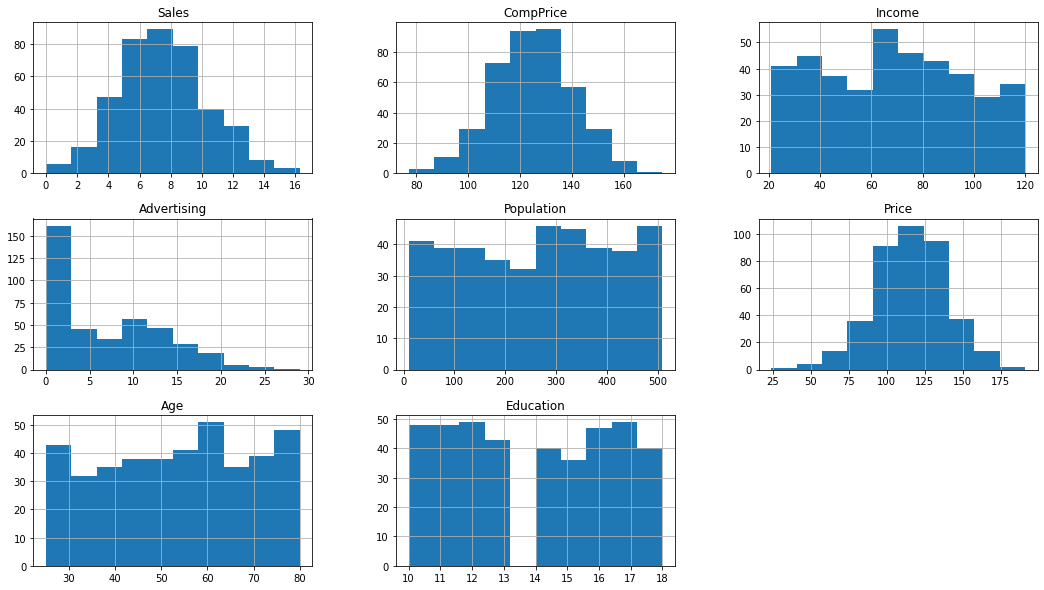

In [10]:
data.hist(['Sales', 'CompPrice','Income','Advertising','Population','Price','Age','Education'], figsize=(18,10))

In [11]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

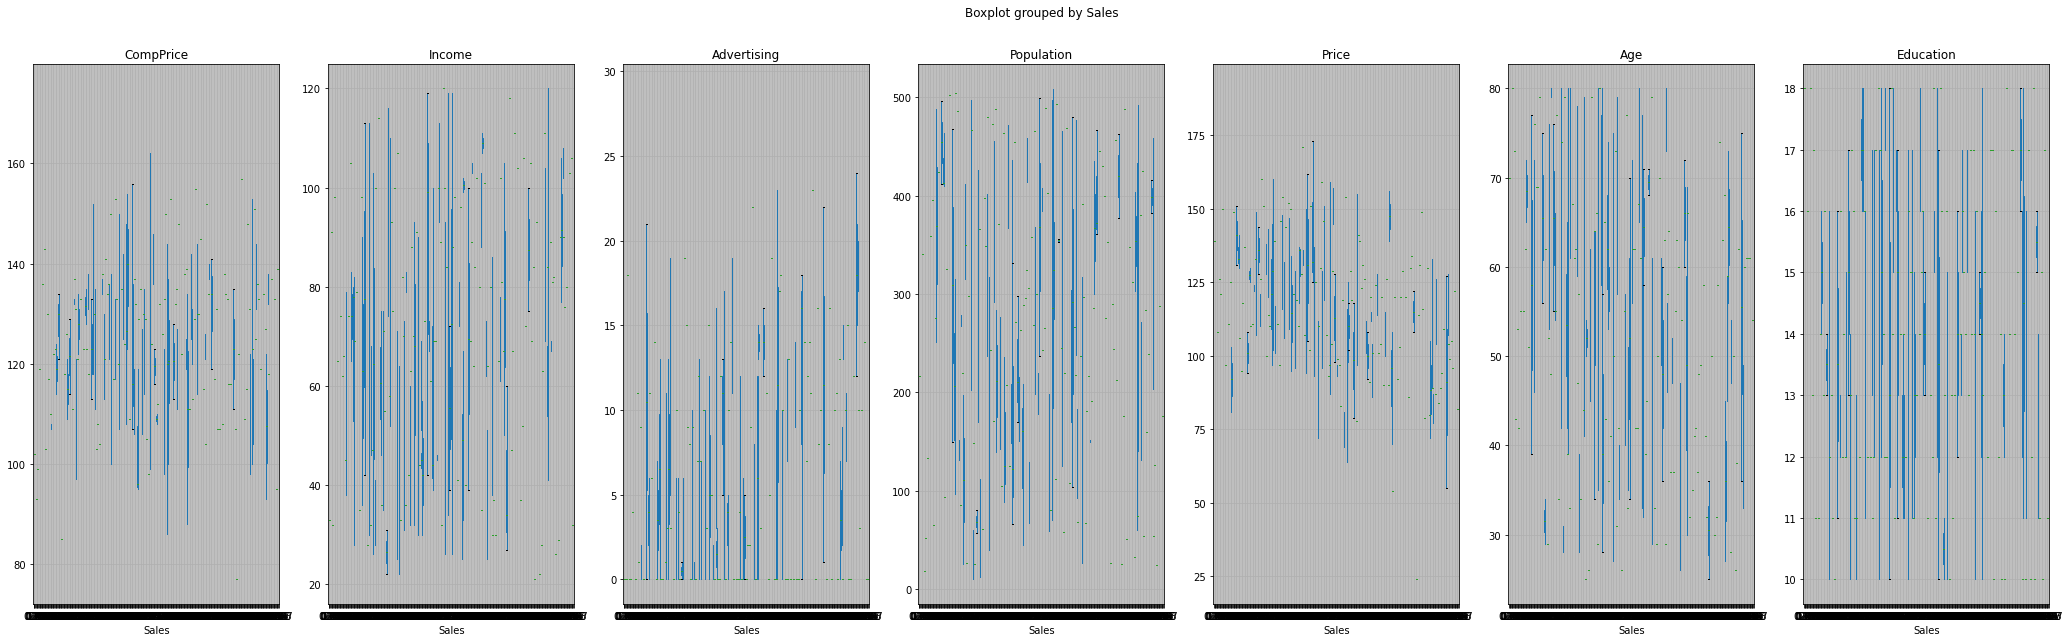

In [18]:
ContinuousColsList=['CompPrice','Income','Advertising','Population','Price','Age','Education']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(35,10))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by='Sales', figsize=(7,10), vert=True, ax=PlotCanvas[i])

In [19]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [20]:
ContinuousVariables=ContinuousColsList
FunctionAnova(inpData=data, TargetVariable='Sales', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

CompPrice is NOT correlated with Sales | P-Value: 0.8646316876572246
Income is NOT correlated with Sales | P-Value: 0.6391100922078781
Advertising is NOT correlated with Sales | P-Value: 0.23135655487010412
Population is NOT correlated with Sales | P-Value: 0.06372341076647661
Price is NOT correlated with Sales | P-Value: 0.13196663905847447
Age is NOT correlated with Sales | P-Value: 0.3608806775359288
Education is NOT correlated with Sales | P-Value: 0.6442421979808187


[]

In [21]:
CrossTabResult=pd.crosstab(index=data['ShelveLoc'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
ShelveLoc,,,,,,,,,,,,,,,,,,,,,
Bad,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Good,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
Medium,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
CrossTabResult=pd.crosstab(index=data['Urban'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
Urban,,,,,,,,,,,,,,,,,,,,,
No,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
Yes,0,0,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,1,0,1,1


In [23]:
CrossTabResult=pd.crosstab(index=data['Education'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
Education,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
11,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
18,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
CrossTabResult=pd.crosstab(index=data['US'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
US,,,,,,,,,,,,,,,,,,,,,
No,1,1,0,0,1,0,0,1,1,1,...,0,0,0,0,1,0,1,1,0,0
Yes,0,0,1,1,0,1,1,0,0,0,...,1,1,1,1,0,1,0,0,1,1


In [25]:
CrossTabResult=pd.crosstab(index=data['Age'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
Age,,,,,,,,,,,,,,,,,,,,,
25,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


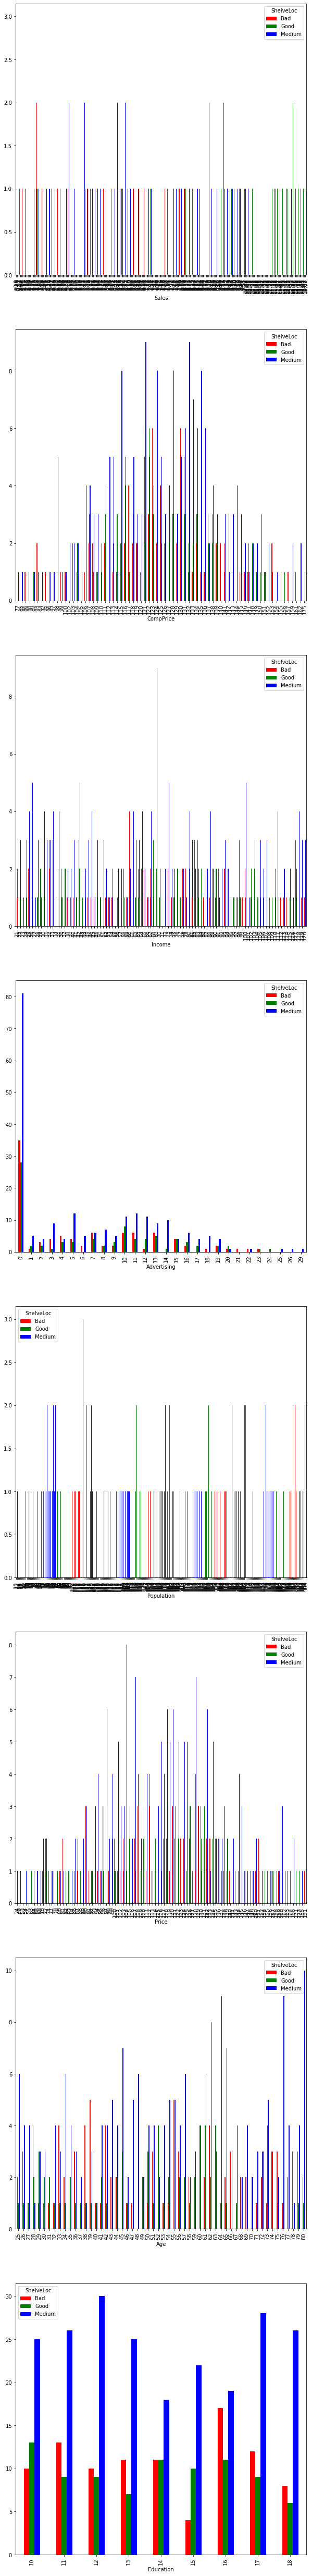

In [28]:
ColsList=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education']
CategoricalCol = ['Urban', 'US']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(ColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(ColsList, range(len(ColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['ShelveLoc'])
    CrossTabResult.plot.bar(color=['red','green','blue'], ax=PlotCanvas[i])

In [46]:
data['Urban'].replace({'Yes':1, 'No':0}, inplace=True)
data['US'].replace({'Yes':1, 'No':0}, inplace=True)
data['ShelveLoc'].replace({'Good':1, 'Bad':0,'Medium':2}, inplace=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [48]:
X = data.drop('Income',axis=1)
y = data['Income']

In [49]:
X.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,11,276,120,0,42,17,1,1
1,11.22,111,16,260,83,1,65,10,1,1
2,10.06,113,10,269,80,2,59,12,1,1
3,7.40,117,4,466,97,2,55,14,1,1
4,4.15,141,3,340,128,0,38,13,1,0


In [50]:
y.head()

0     73
1     48
2     35
3    100
4     64
Name: Income, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.ensemble import RandomForestRegressor 
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestRegressor(max_depth=10, n_estimators=100)
# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
y_pred=RF.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,43.014583,43.861172,43.918357,44.037267,47.754429,49.078449,51.159441,51.892167,52.137965,52.335729,...,80.252366,80.342655,81.008573,81.766885,82.077392,82.380075,82.889775,86.558559,86.843500,89.185489
Actual Result,,,,,,,,,,,,,,,,,,,,,
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27.530288167005676
Mean Squared Error: 1032.174185961558
Root Mean Squared Error: 32.127467780103025


In [74]:
from sklearn.ensemble import RandomForestClassifier 
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100)
# Creating the model on Training Data
RFC=clf.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          21       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       3.0
          24       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       2.0
          26       0.00      0.00      0.00       3.0
          27       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       2.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       3.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       3.0
          33       0.00      0.00      0.00       4.0
          35       0.00      0.00      0.00       2.0
          36       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       3.0
          38   


Accuracy values for 10-fold Cross Validation:
 [0.005  0.     0.015  0.0125 0.    ]

Final Average Accuracy of the model: 0.01


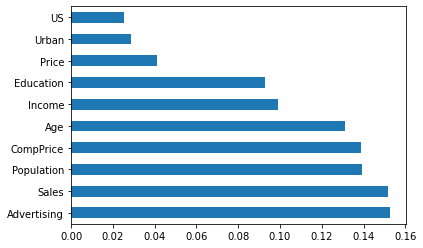

In [60]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US'])
feature_importances.nlargest(10).plot(kind='barh')

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

          21       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       3.0
          24       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       2.0
          26       0.00      0.00      0.00       3.0
          27       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       2.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       3.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       3.0
          33       0.00      0.00      0.00       4.0
          35       0.00      0.00      0.00       2.0
          36       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       3.0
       


Accuracy values for 10-fold Cross Validation:
 [0.0125     0.00416667 0.         0.00916667 0.00625   ]

Final Average Accuracy of the model: 0.01


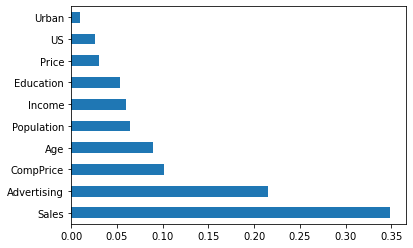

In [63]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US'])
feature_importances.nlargest(10).plot(kind='barh')

# Fraud Check

In [78]:
data=pd.read_csv('Fraud_check.csv')
print(data.shape)
data.head(5)

(600, 6)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [79]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [80]:
data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [82]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

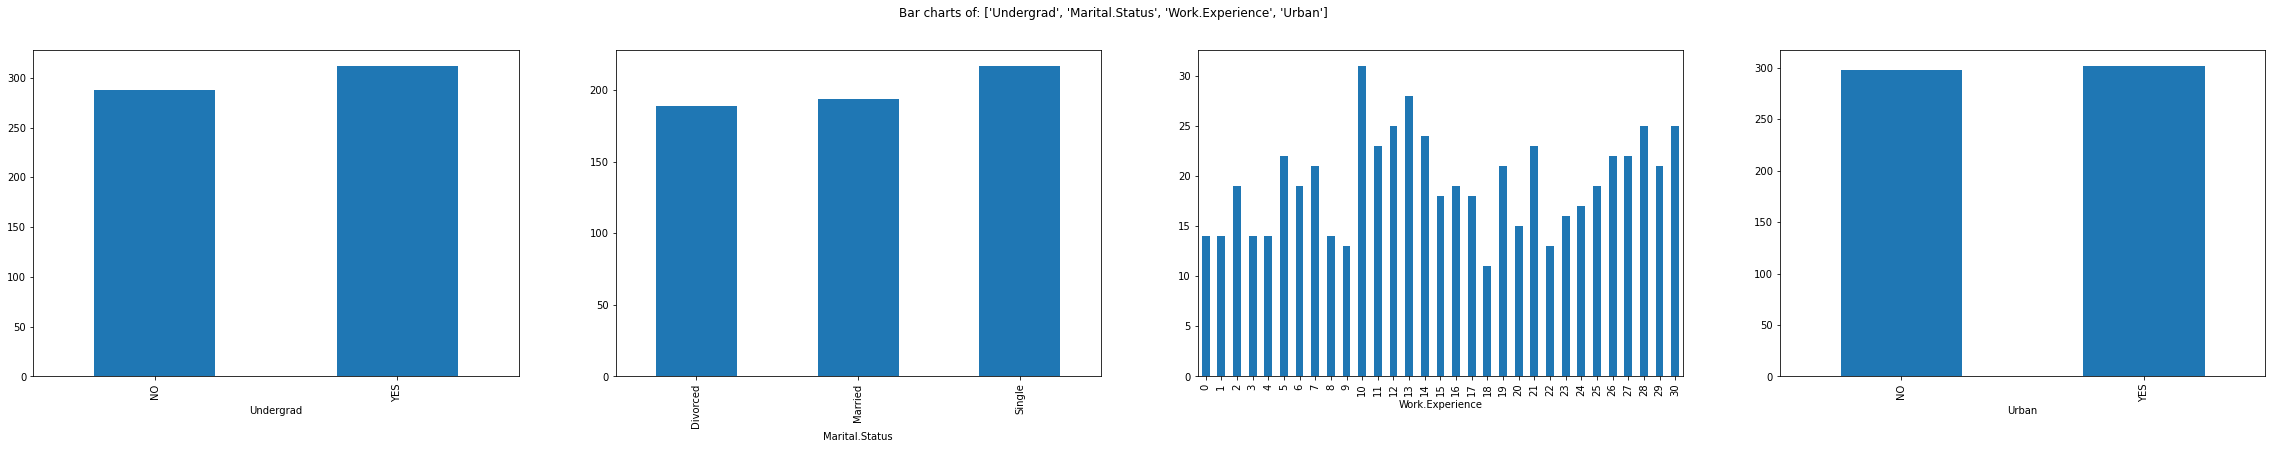

In [83]:
PlotBarCharts(inpData=data, 
              colsToPlot=['Undergrad', 'Marital.Status', 'Work.Experience','Urban'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187C6327220>,
      dtype=object)

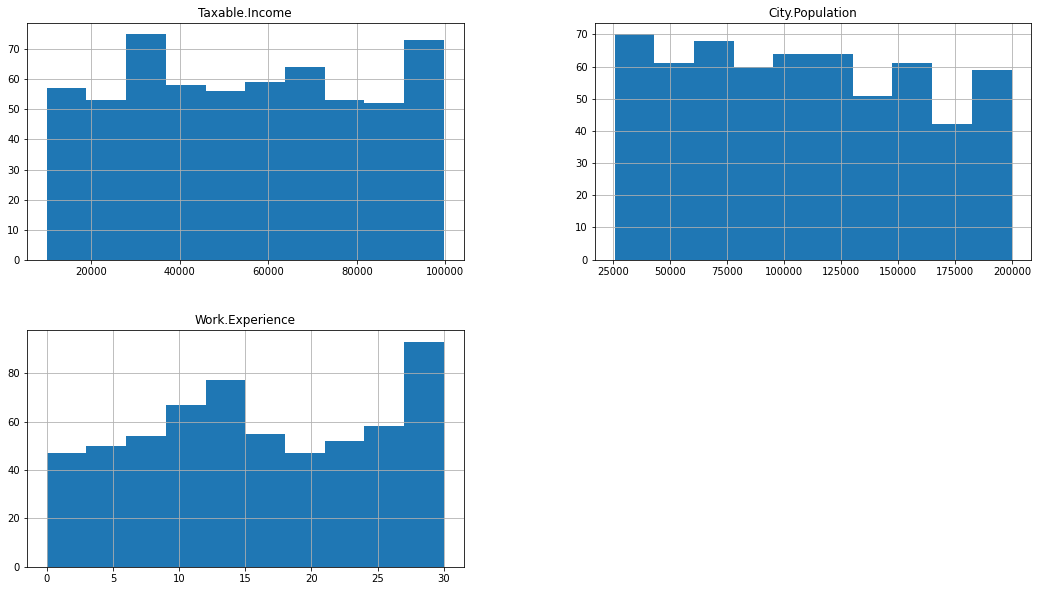

In [84]:
data.hist(['Taxable.Income', 'City.Population','Work.Experience'], figsize=(18,10))

In [85]:
data['Tax'] = np.where(data['Taxable.Income']<= 30000 ,'Risky', 'Good')

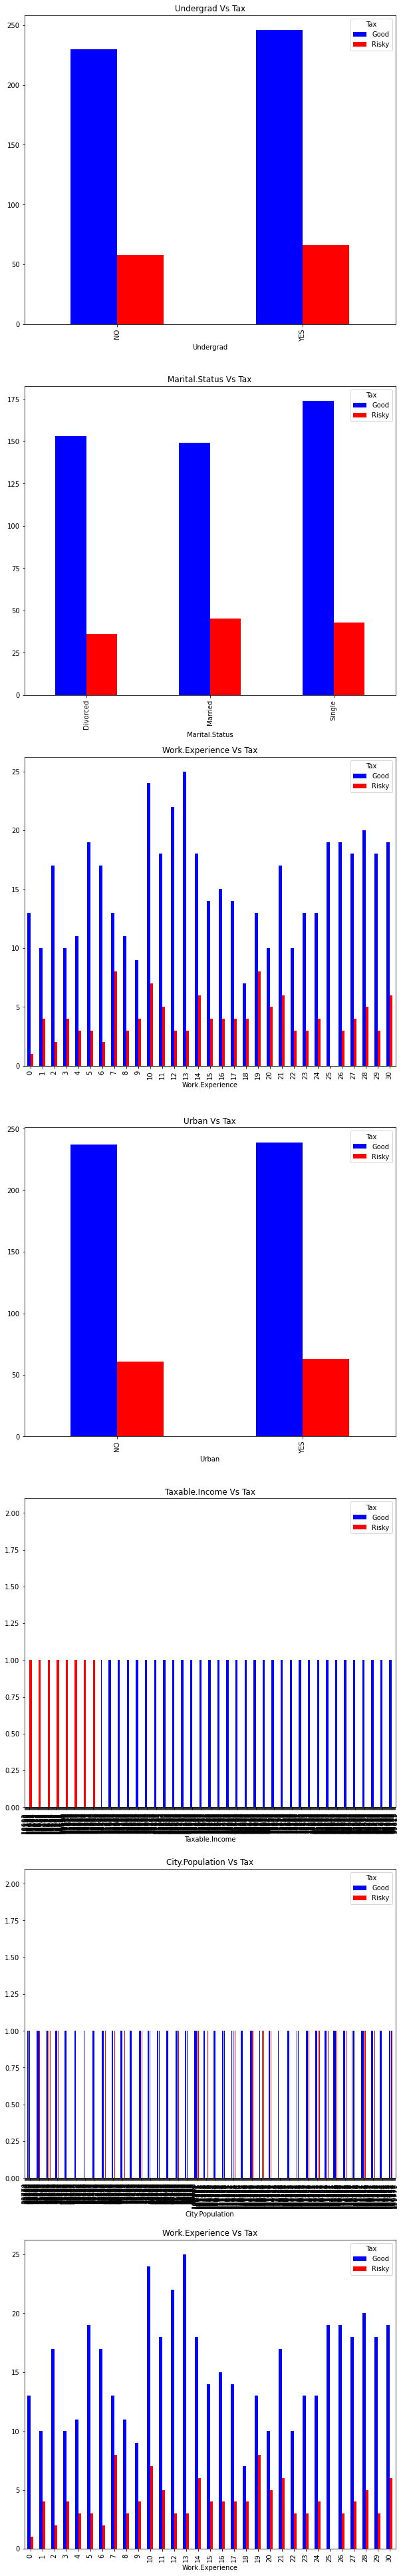

In [88]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Undergrad', 'Marital.Status', 'Work.Experience','Urban',
                    'Taxable.Income', 'City.Population','Work.Experience']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,70))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "SalaryGT50K"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['Tax'])
    CrossTabResult.plot.bar(color=['blue','red'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Tax')

In [92]:
data['Urban'].replace({'YES':1, 'NO':0}, inplace=True)
data['Undergrad'].replace({'YES':1, 'NO':0}, inplace=True)
data['Tax'].replace({'Risky':1, 'Good':0}, inplace=True)
data['Marital.Status'].replace({'Single':1, 'Divorced':0,'Married':2}, inplace=True)
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,1,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,2,36925,160205,30,1,0
3,1,1,50190,193264,15,1,0
4,0,2,81002,27533,28,0,0


In [93]:
X = data.drop('Tax', axis=1)
y = data['Tax']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [95]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
X_train

array([[-1.03161048, -0.00823415,  0.37144707, -0.16889878, -1.41421198,
        -1.00892875],
       [-1.03161048,  1.22688817,  0.82470395, -0.50188197, -0.85360998,
         0.99115027],
       [ 0.96935812, -0.00823415,  0.48491349, -0.67934736,  0.04335322,
        -1.00892875],
       ...,
       [-1.03161048,  1.22688817,  0.1459221 ,  1.45118979,  1.27667762,
        -1.00892875],
       [ 0.96935812, -1.24335647,  1.21449269,  0.95255602, -0.51724878,
        -1.00892875],
       [-1.03161048,  1.22688817, -1.56318966, -0.13515665, -1.30209158,
         0.99115027]])

In [96]:
from sklearn.ensemble import RandomForestRegressor 
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestRegressor(max_depth=10, n_estimators=100)
# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
y_pred=RF.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0.0,1.0
Actual Result,,
0,118,0
1,0,32


In [97]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [98]:
from sklearn.ensemble import RandomForestClassifier 
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100)
# Creating the model on Training Data
RFC=clf.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[118   0]
 [  0  32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        32

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

1.0



Accuracy values for 10-fold Cross Validation:
 [nan  1. nan  1. nan]

Final Average Accuracy of the model: nan


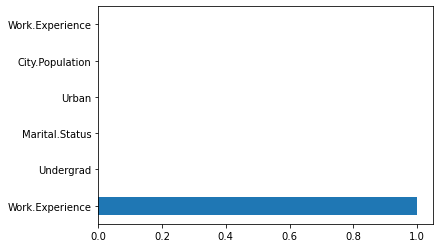

In [102]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=['Undergrad', 'Marital.Status', 'Work.Experience','Urban',
                     'City.Population','Work.Experience'])
feature_importances.nlargest(10).plot(kind='barh')

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        32

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[118   0]
 [  0  32]]
Accuracy of the model on Testing Sample Data: 1.0



Accuracy values for 10-fold Cross Validation:
 [1.         0.99172632 1.         1.         1.        ]

Final Average Accuracy of the model: 1.0


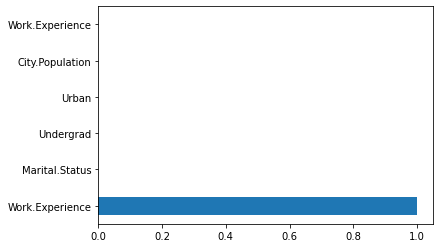

In [107]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=['Undergrad', 'Marital.Status', 'Work.Experience','Urban',
                     'City.Population','Work.Experience'])
feature_importances.nlargest(10).plot(kind='barh')